## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)

* 피처 엔지니어링(Feature Engineering)은 머신러닝 모델을 훈련시키기 위해 입력 데이터로 사용되는 피처(또는 변수)들을 가공하거나 새로운 피처를 만들어내는 과정을 말합니다. 피처 엔지니어링은 머신러닝 성능을 향상시키고 모델의 일반화 성능을 향상시키는 데 핵심적인 역할을 합니다. 현실 세계의 데이터는 종종 불완전하고 노이즈가 많습니다. 결측값, 이상치, 오류 등이 있을 수 있습니다. 종속 변수와의 관계를 강화하고 모델이 더 나은 예측을 할 수 있도록 도와줍니다. 예를 들어, 특정 도메인 지식을 활용하여 새로운 피처를 생성하거나 기존 피처를 변형시켜 모델이 패턴을 더 잘 파악하도록 할 수 있습니다. 불필요한 피처를 제거하거나 피처를 효과적으로 변형함으로써 모델의 계산 효율성을 높일 수 있습니다. 이는 모델을 더 빠르게 훈련시키고 실행시킬 수 있습니다.

* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df = df.dropna()

## 미션 1) - 수치형 변수를 범주형 변수로 만들기

* 월별 지불 금액을 그룹화하여 지불 금액 구간별 경향성을 분석할 수 있습니다. 이러한 수치형 데이터의 범주화는 수치형 데이터에 이상치가 있을 경우, 이를 구간화함으로써 이상치의 영향을 줄일 수 있습니다. 범주화된 데이터는 일반적으로 이해하기 쉽습니다. 그리고 모델이 특정 수치에 과도하게 적합되는 것을 방지할 수 있습니다. 수치형 데이터를 구간으로 나눔으로써 모델이 데이터의 일반적인 패턴을 학습하는 데 집중하도록 할 수 있습니다. 범주화된 데이터는 시각화 및 보고서 작성 시 직관적이고 명확한 정보 전달이 가능합니다. 데이터의 분포, 추세 등을 파악하기에 용이합니다. 데이터의 분포가 불균일할 때, 구간화를 통해 각 범주 내 데이터의 분포를 보다 균일하게 만들 수 있습니다. 위와 같은 이유로 수치형 변수를 범주화 하는 미션을 진행해 보겠습니다.

* 수치형 변수를 범주형 변수로 변환합니다.
* MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.

* 다음과 같이 원본과 구간을 나눈 데이터를 비교해 주세요. 기준이 정해져 있지 않으며 정답이 없으니 자율적으로 나눠 보세요.

| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:-----------------------|
| 7590-VHVEG   |            29.85 | 0-30                   |
| 5575-GNVDE   |            56.95 | 30-70                  |
| 3668-QPYBK   |            53.85 | 30-70                  |
| 7795-CFOCW   |            42.3  | 30-70                  |
| 9237-HQITU   |            70.7  | 70-99                  |

<table>
    <tr>
        <td><img src="https://i.imgur.com/Tiub25Z.png" width="300"></td>
        <td><img src="https://i.imgur.com/7iGsGPB.png" width="300"></td>
    </tr>
</table>

18.25 118.75


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

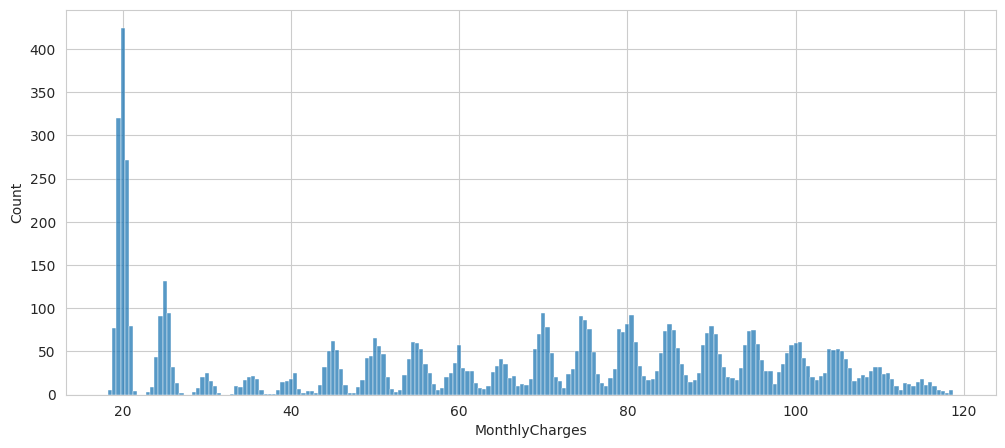

In [ ]:
#0부터 값을 나누거되면 최저값이하값은 무의미한값이기따문에 안될꺼라 생각
#최대 최소값을 확인해서 균일하게 나누는거로 계산

#최대 최소값 확인
MC_min = df['MonthlyCharges'].min()
MC_max = df['MonthlyCharges'].max()
print(MC_min, MC_max)
#최대, 최소값차이가 약100

#요금에대한 상세 확인
sns.set_style('whitegrid')
figure = plt.figure(figsize=(12, 5))

sns.histplot(data=df,x='MonthlyCharges',binwidth=0.5)
#->각5단위마다 카운트 수가 많은걸 확인
#(최소값을 시작으로 5의 배수단위로 분리해야겠다 생각)

<ipython-input-7-3143ea1d08c4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='MonthlyCharges_Group', palette='Set1')


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

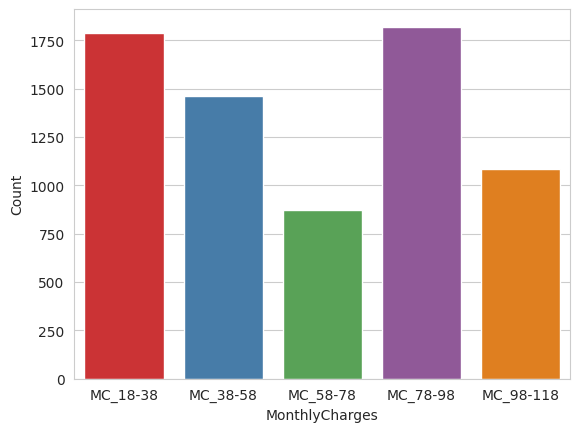

In [ ]:
#20단위로 분리
sns.histplot(data=df,x='MonthlyCharges',bins=5)

bins = [18,38,68,78,98,120]
labels = ['MC_18-38', 'MC_38-58','MC_58-78','MC_78-98','MC_98-118']

df['MonthlyCharges_Group'] = pd.cut(df['MonthlyCharges'], bins=bins, labels = labels)
#print(df_cut.describe())
sns.countplot(data=df,x='MonthlyCharges_Group', palette='Set1')

[23.0, 33.0, 43.0, 53.0, 63.0, 73.0, 83.0, 93.0, 103.0, 113.0, 123.0] [18, 28, 38, 48, 58, 68, 78, 88, 98, 108, 120]


<ipython-input-8-522b2dd46253>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='MonthlyCharges_Group', palette='Set1')


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7032 non-null   object 
 1   SeniorCitizen         7032 non-null   int64  
 2   Partner               7032 non-null   object 
 3   Dependents            7032 non-null   object 
 4   tenure                7032 non-null   int64  
 5   PhoneService          7032 non-null   object 
 6   MultipleLines         7032 non-null   object 
 7   InternetService       7032 non-null   object 
 8   OnlineSecurity        7032 non-null   object 
 9   OnlineBackup          7032 non-null   object 
 10  DeviceProtection      7032 non-null   object 
 11  TechSupport           7032 non-null   object 
 12  StreamingTV           7032 non-null   object 
 13  StreamingMovies       7032 non-null   object 
 14  Contract              7032 non-null   object 
 15  PaperlessBi

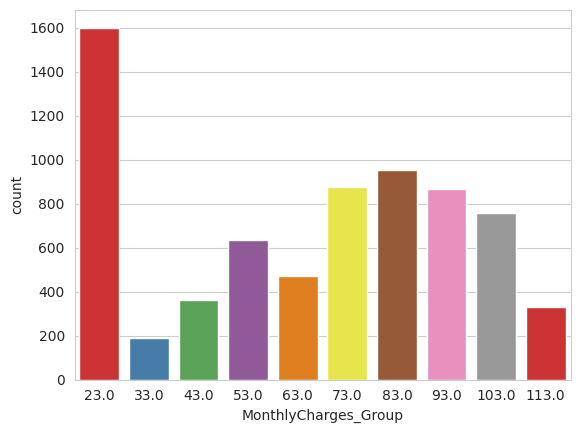

In [ ]:
#나눌값을 넣으면 자동으로 범주현으로 표현되게..

labels_name_list=[]  #라벨이름 리스트
labels_value_list=[]  #라벨값 리스트

interval = 10  #나눌값

for i in range(18,128,interval):
    labels_name_list.append(i+(interval/2))  #중간값
    labels_value_list.append(i)

labels_value_list[-1] = 120  #max값이 118이넘어서 118이상값으로..
print(labels_name_list, labels_value_list)


df['MonthlyCharges_Group'] = pd.cut(df['MonthlyCharges'], bins=labels_value_list, labels = labels_name_list[:-1])
df["MonthlyCharges_Group"] = pd.to_numeric(df["MonthlyCharges_Group"], errors="coerce")
sns.countplot(data=df,x='MonthlyCharges_Group', palette='Set1')
df.info()

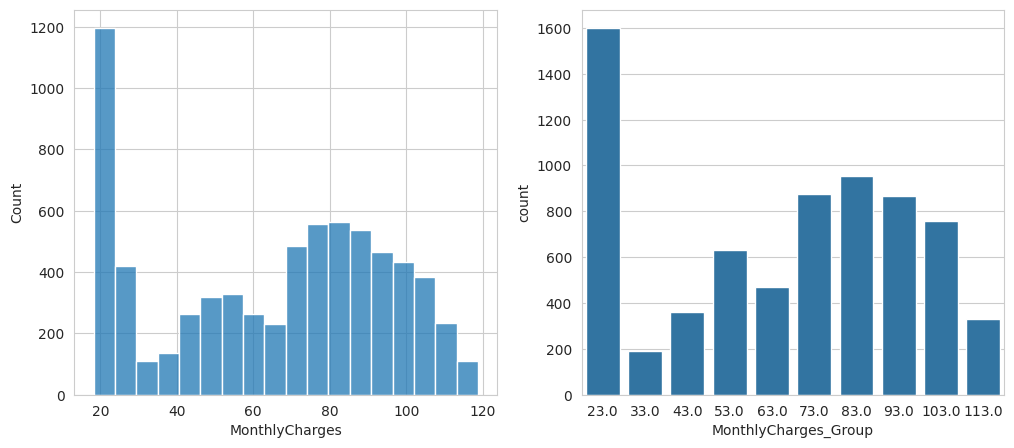

In [ ]:
# 여기에 구간화 전의 수치 변수에 대한 히스토그램과 구간화 이후 범주로 변환해준 변수에 대한 countplot을 시각화 해주세요.
sns.set_style('whitegrid')
fig,axes = plt.subplots(ncols=2,figsize=(12, 5))

sns.histplot(data=df['MonthlyCharges'], ax=axes[0])
sns.countplot(data=df, x='MonthlyCharges_Group', ax=axes[1])
plt.show()

## 미션 2) - One-Hot-Encoding 하기

* One-Hot Encoding은 범주형 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 기술 중 하나입니다. One-Hot Encoding을 사용하면 각 범주 간의 거리가 동일하게 유지됩니다. 즉, 범주 간의 유사성을 측정할 때 각 범주가 동일한 거리로 취급되므로 모델이 범주 간의 관계를 더 정확하게 학습할 수 있습니다. One-Hot Encoding은 범주의 수에 따라 적절한 차원을 생성하므로 데이터가 새로운 범주로 확장되거나 변할 때 모델이 쉽게 일반화될 수 있습니다. 각 범주가 독립된 차원으로 표현되므로, 모델의 예측이나 특성 중요도를 해석할 때 각 범주에 대한 기여를 명확하게 파악할 수 있습니다. 라벨 인코딩과 같은 다른 방법들이 범주 간의 임의의 순서를 생성할 수 있는 반면, One-hot encoding은 이러한 문제를 방지하고 모델이 데이터를 오해하는 것을 막습니다. 하지만, One-hot encoding은 범주의 수가 매우 많을 때 차원의 저주(curse of dimensionality)를 초래하거나, 데이터가 희소해질 수 있으므로 적용 시 이러한 점을 고려해야 합니다. 다음의 예시처럼 데이터를 One-Hot-Encoding 해주세요.

<img src="https://i.imgur.com/9Njm4aN.png">

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


In [ ]:
# 여기에 one-hot-encoding 을 구현해 주세요.
columns_list = df.columns.tolist()

one_hot_df = df[['SeniorCitizen','tenure', 'TotalCharges', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MonthlyCharges_Group']]

one_hot_list = ['gender', 'Partner', 'Dependents', 'PhoneService']
df_ohe = pd.get_dummies(one_hot_df,columns = one_hot_list)
df_ohe.head()

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes
customerID,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,33.0,1,0,0,1,1,0,1,0
5575-GNVDE,0,34,1889.50,53.0,0,1,1,0,1,0,0,1
3668-QPYBK,0,2,108.15,53.0,0,1,1,0,1,0,0,1
7795-CFOCW,0,45,1840.75,43.0,0,1,1,0,1,0,1,0
9237-HQITU,0,2,151.65,73.0,1,0,1,0,1,0,0,1


## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.

* 이 미션은 데이터 전처리와 피처 엔지니어링의 중요성을 이해하고, 실제 비즈니스 문제에 적용할 수 있는 머신러닝 모델을 개발하는 데 중점을 둡니다. 통신사 고객 데이터를 활용하여 고객의 이탈 여부를 예측하는 머신러닝 모델을 개발하고, 여러 피처 엔지니어링 기법을 적용하여 모델의 정확도(Accuracy)를 높여보세요. 고객 이탈 여부 예측은 통신사에 있어 중요한 비즈니스 문제로, 고객 유지 전략 수립에 큰 영향을 미칩니다.

* 피처엔지니어링을 진행하고 모델의 성능을 평가합니다.
* 모델은 트리계열 모델 외 다른 모델을 사용해도 됩니다.


In [ ]:
X = df_ohe
y = df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

feature_names = X_train.columns.tolist()
feature_names

['SeniorCitizen',
 'tenure',
 'TotalCharges',
 'MonthlyCharges_Group',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes']

In [ ]:
# 여기에 모델을 구현해 주세요.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 1830-GGFNM to 5240-IJOQT
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         5625 non-null   int64  
 1   tenure                5625 non-null   int64  
 2   TotalCharges          5625 non-null   float64
 3   MonthlyCharges_Group  5625 non-null   float64
 4   gender_Female         5625 non-null   uint8  
 5   gender_Male           5625 non-null   uint8  
 6   Partner_No            5625 non-null   uint8  
 7   Partner_Yes           5625 non-null   uint8  
 8   Dependents_No         5625 non-null   uint8  
 9   Dependents_Yes        5625 non-null   uint8  
 10  PhoneService_No       5625 non-null   uint8  
 11  PhoneService_Yes      5625 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 263.7+ KB


In [ ]:
#max_depth에 따른 값 확인

from sklearn.metrics import accuracy_score
tree_model_depth_list=[]  #정확도 저장할 리스트
for i in range(1,20+1):

    model = DecisionTreeClassifier(random_state=42, max_depth=i)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    acc = round((accuracy_score(y_test, y_predict) *100),3)

    tree_model_depth_list.append(acc)  #리스트에 추가
    print('depth값이'+str(i)+'일때 정확도 : '+ str(acc)+'%')

depth값이1일때 정확도 : 73.419%
depth값이2일때 정확도 : 77.896%
depth값이3일때 정확도 : 77.896%
depth값이4일때 정확도 : 77.47%
depth값이5일때 정확도 : 77.967%
depth값이6일때 정확도 : 77.541%
depth값이7일때 정확도 : 77.541%
depth값이8일때 정확도 : 76.688%
depth값이9일때 정확도 : 75.409%
depth값이10일때 정확도 : 75.835%
depth값이11일때 정확도 : 73.703%
depth값이12일때 정확도 : 72.85%
depth값이13일때 정확도 : 71.429%
depth값이14일때 정확도 : 72.992%
depth값이15일때 정확도 : 71.571%
depth값이16일때 정확도 : 71.144%
depth값이17일때 정확도 : 70.931%
depth값이18일때 정확도 : 70.789%
depth값이19일때 정확도 : 70.647%
depth값이20일때 정확도 : 70.078%


In [ ]:
def tree_model_depth_best(depth_r_list):
    '''정확도 최고값 찾아 그래프'''
    bset_value = depth_r_list.index(max(depth_r_list))+1
    model = DecisionTreeClassifier(random_state=42, max_depth=bset_value)
    model.fit(X_train,y_train)

    from sklearn.tree import plot_tree

    plt.figure(figsize=(20,20))
    tree = plot_tree(model, feature_names=feature_names,
                 filled=True, fontsize=10, max_depth=bset_value)

    print('Best_max_depth : ' + '\033[95m' + str(bset_value) + '\033[0m')
    print('정확도 : ' + '\033[92m' + str(max(depth_r_list)) + '%' + '\033[0m')
   # print(model.score(X_train, y_train))
    plt.show()

Best_max_depth : 5
정확도 : 77.967%


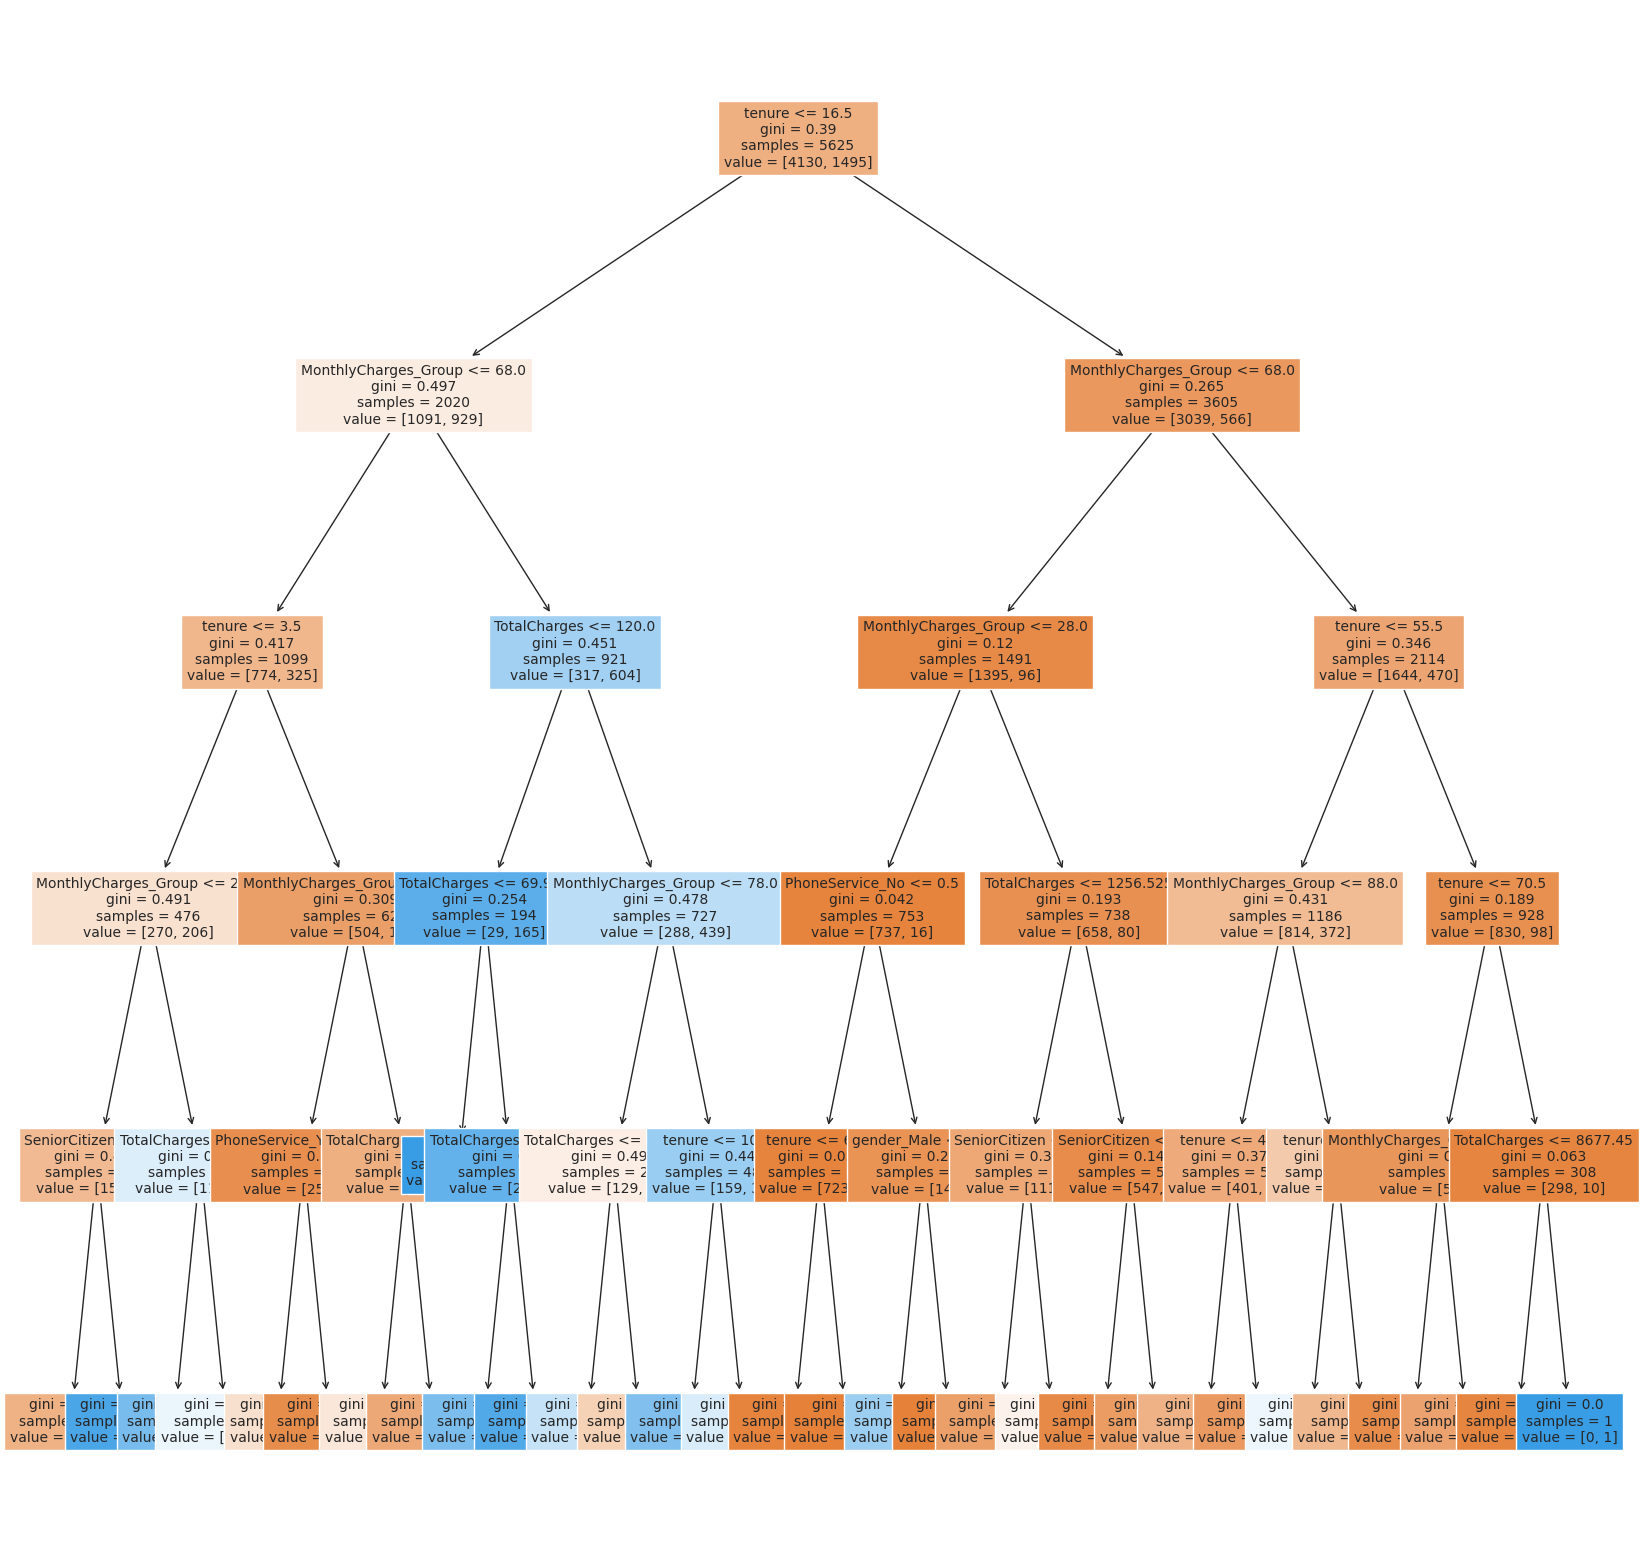

In [ ]:
#'MonthlyCharges'포함시
#77.896%

#'MonthlyCharges_Group'로 변경시
# 20단위 나눌때 : 76.617% => 10단위 나눌때 : 77.967% => 5단위 나눌때 : 77.896%
# Best = 10단위

tree_model_depth_best(tree_model_depth_list)

In [ ]:
#RandomForest을 이용한 정확도
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, max_depth=4, oob_score=False, max_features='sqrt')
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

print(model.score(X_test, y_test))
#print(model.feature_importances_)

0.7341862117981521


In [ ]:
#GaussianNB을 이용한 정확도
from sklearn.naive_bayes import GaussianNB # model 생성
model = GaussianNB()
model.fit(X_train, y_train)
model.predict(X_test)

print(model.score(X_test, y_test))

0.7085998578535891


In [ ]:
#SVC을 이용한 정확도
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
model.predict(X_test)

print(model.score(X_test, y_test))

0.7341862117981521


In [ ]:
#MLPClassifier을 이용한 정확도
from sklearn.neural_network import MLPClassifier

#model = MLPClassifier(hidden_layer_sizes=(8,),alpha=0.01,random_state=42,activation='logistic')
model = MLPClassifier(hidden_layer_sizes=(8,),alpha=0.01,random_state=42)

model.fit(X_train, y_train)
model.predict(X_test)

print(model.score(X_test, y_test))
#print(model.score(X_train, y_train))

0.7768301350390903
